In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd


L'impédance à l'entrée de la flute permet de déterminer à l'aide de la méthode de l'impédance ramenée .
On concidère l'écoulement laminaire.
L'épaisseur caractéristique compte.
# Impedance de mesure

On peut utiliser la méthode de l'impédance ramenée pour faire ce qu'on a besoin.

For a conical tube, the relation of impedance follows
\begin{align*}
    \begin{bmatrix}
        p_1\\
        u_1
    \end{bmatrix}
    =
    \begin{bmatrix}
        A & B \\ C & D
    \end{bmatrix}
    \begin{bmatrix}
        p_2\\
        u_2
    \end{bmatrix}
\end{align*}
where
\begin{align*}
    A &= \frac{R_2}{R_1} \cos(kL) - \frac{\sin(kL)}{kx_1}\\
    B &= j\frac{\rho_0 c_0}{\pi R_1 R_2}\sin(kL)\\
    C &= \frac{\pi R_1 R_2}{\rho_0 c_0}\left( j \sin(kL) \left( 1 + \frac{1}{k^2x_1 x_2}\right) + \frac{\cos(kL)}{jk}\left(\frac{1}{x_1}-\frac{1}{x_2}\right) \right)\\
    D &= \frac{R_1}{R_2}\cos(kL) + \frac{\sin(kL)}{kx_2}
\end{align*}
and $Z_{m,i} = \frac{p_i}{u_i}$. The cylindrical tube is a special case of the conical tube with $R_1 = R_2 = a$ and $x_1 = x_2 = \infty$.

In [2]:
config = {
    'data_folder': 'data/impedance mesure',
    'file_name': 'Impedance.txt',
}

In [8]:
from scipy.signal import find_peaks

def get_local_maximas(data, frequences):
    """
    Identifies local maxima in the given data array and returns the maxima with their corresponding frequencies.
    Returns:
    tuple: A tuple of two numpy arrays:
        - maxima_values: Values of the local maxima in the data.
        - maxima_frequencies: Frequencies corresponding to the local maxima.
    """
    # Identify indices of local maxima
    maxima_indices = find_peaks(np.abs(data), distance = data.shape[0]/8)[0]
    # Get the corresponding maxima values and frequencies
    maxima_values = data[maxima_indices]
    maxima_frequencies = frequences[maxima_indices]
    
    return maxima_values, maxima_frequencies,maxima_indices
def get_local_minimas(data, frequences):
    # Same with minima
    minima_indices = find_peaks(-np.abs(data), distance = data.shape[0]/8)[0]
    # Get the corresponding maxima values and frequencies
    maxima_values = data[minima_indices]
    maxima_frequencies = frequences[minima_indices]
    
    return maxima_values, maxima_frequencies
def to_db(expr):
    return 20 * np.log(np.abs(expr))

In [10]:
## Test function to get local maximas

data = pd.DataFrame(columns=['Freq', 'Impedance'])

path = os.path.join(config['data_folder'], 'Flute', config['file_name'])
tmp = pd.read_csv(path, sep="\\s+", decimal=',', header=None)

data['Freq'] = tmp.iloc[:, 0]
data['Impedance'] = tmp.iloc[:, 1] + 1j * tmp.iloc[:, 2]

print(get_local_maximas(data['Impedance'].to_numpy(),data['Freq'].to_numpy()))

(array([69.65954196-23.35071533j, 27.24315648 +1.86061878j,
       14.43350351 +0.08856854j,  9.48864183 -0.41098432j,
        5.59698269 +1.91105619j]), array([ 443.4, 1335.2, 2228. , 3121.6, 3999.4]), array([ 1717,  6176, 10640, 15108, 19497]))


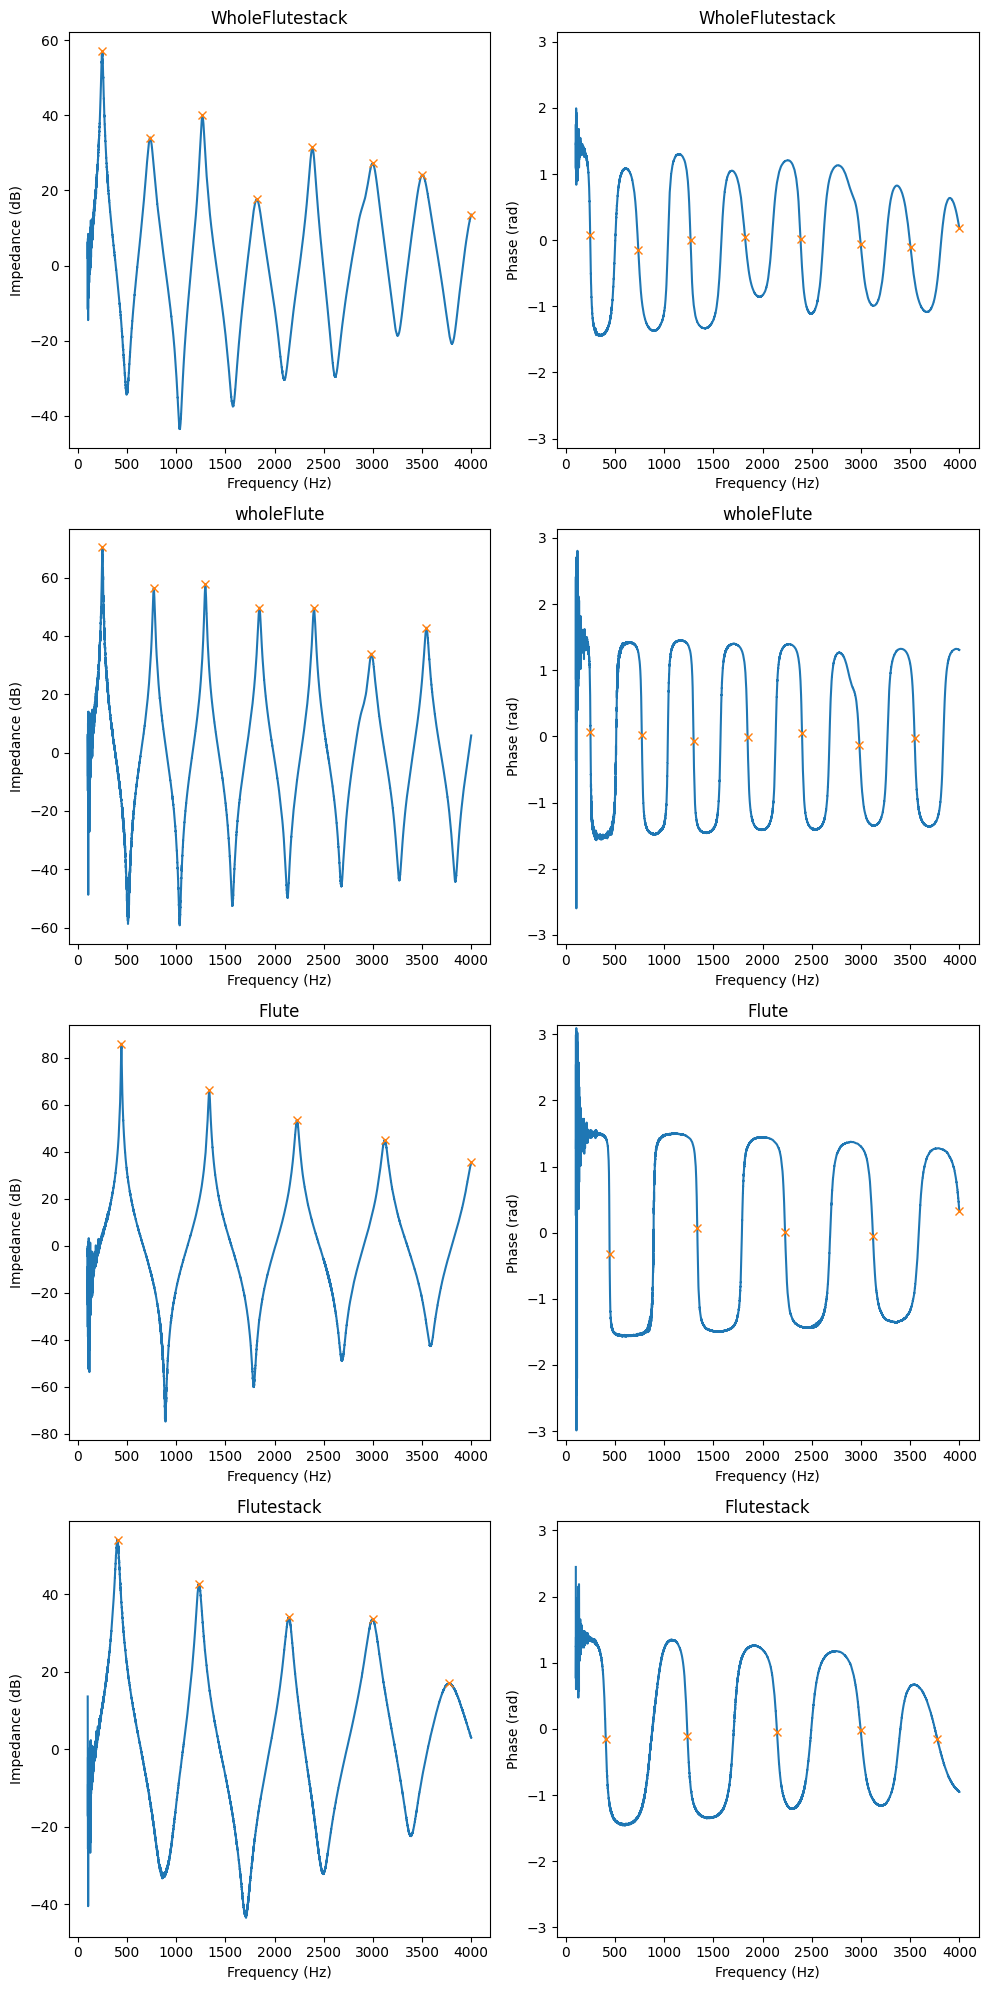

In [11]:
subfolders = [f for f in os.listdir(config['data_folder']) if os.path.isdir(os.path.join(config['data_folder'], f))]

N_fig = len(subfolders)
fig, ax = plt.subplots(N_fig, 2, figsize=(10, 5 * N_fig))

data = pd.DataFrame(columns=['Freq', 'Impedance'])

for idx, subfolder in enumerate(subfolders):
    path = os.path.join(config['data_folder'], subfolder, config['file_name'])
    tmp = pd.read_csv(path, sep="\\s+", decimal=',', header=None)

    data['Freq'] = tmp.iloc[:, 0]
    data['Impedance'] = tmp.iloc[:, 1] + 1j * tmp.iloc[:, 2]


    # ax[idx, 0].plot(data['Freq'], np.abs(data['Impedance']))
    ax[idx, 0].plot(data['Freq'], to_db(data['Impedance']))
    ax[idx, 0].set_title(subfolder)
    ax[idx, 0].set_xlabel('Frequency (Hz)')
    ax[idx, 0].set_ylabel('Impedance (dB)')

    max_values,  max_freq, max_indices = get_local_maximas(data['Impedance'],data['Freq'])
    ax[idx, 0].plot(max_freq, to_db(max_values), "x")

    ax[idx, 1].plot(data['Freq'], np.angle(data['Impedance']))
    ax[idx, 1].set_title(subfolder)
    ax[idx, 1].set_xlabel('Frequency (Hz)')
    ax[idx, 1].set_ylabel('Phase (rad)')
    ax[idx, 1].set_ylim(-np.pi, np.pi)
    ax[idx, 1].plot(max_freq, np.angle(data['Impedance'][max_indices]), "x")


plt.tight_layout()
plt.show()


On constate que les pics correspondent à un changement de phase à 0.

# bifurcation

In [17]:
import numpy as np

source_file_path = "./data/bifurcation_mesure/bifurcation_data.csv"
data = np.genfromtxt(source_file_path, delimiter=";").T
pressure = data[0]
ampls = data[1]
freqs = data[2]

Text(0.5, 1.0, 'Amplitude en fonction de la pression')

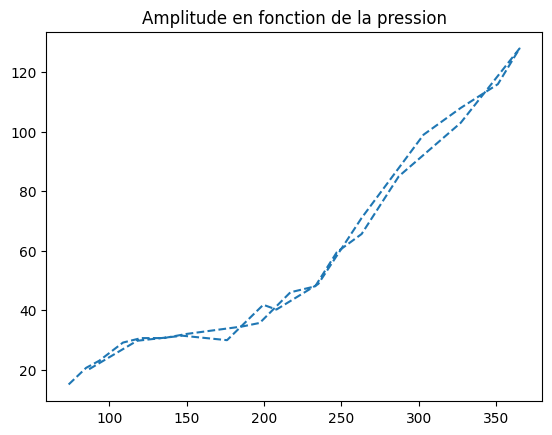

In [18]:
import matplotlib.pyplot as plt
plt.plot(pressure, ampls, "--")
plt.title("Amplitude en fonction de la pression")

Text(0.5, 1.0, 'Amplitude en fonction de la pression')

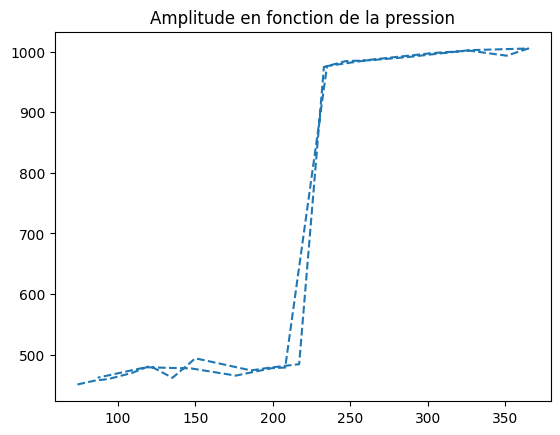

In [ ]:
import matplotlib.pyplot as plt
plt.plot(pressure, freqs, "--")
plt.title("Frequency en fonction de la pression")

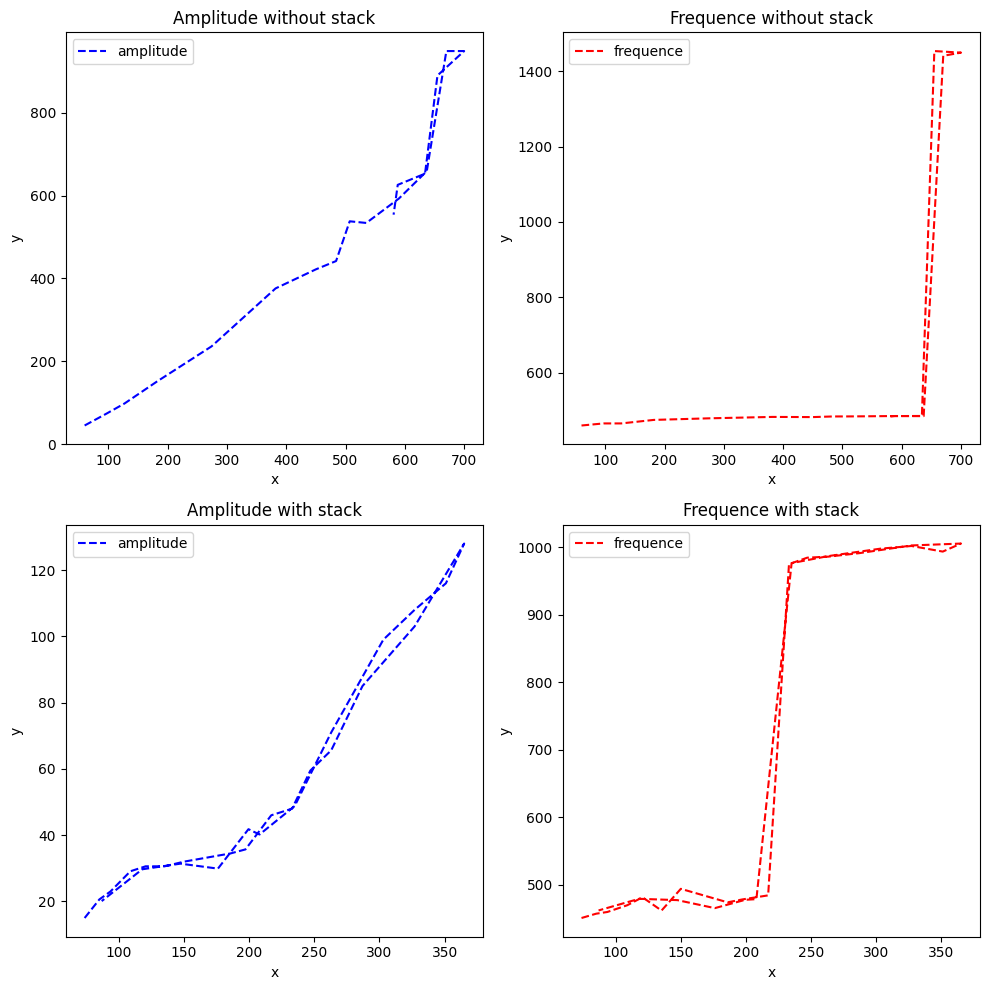

In [13]:
import numpy as np
import matplotlib.pyplot as plt
with_stack_path = "./data/bifurcation_mesure/bifurcation_data_with_stack.csv"
with_stack_data = np.genfromtxt(with_stack_path, delimiter=";").T
with_stack_pressure = with_stack_data[0]
with_stack_ampls = with_stack_data[1]
with_stack_freqs = with_stack_data[2]


without_stack_path = "./data/bifurcation_mesure/bifurcation_data_without_stack.csv"
without_stack_data = np.genfromtxt(without_stack_path, delimiter=";").T
without_stack_pressure = without_stack_data[0]
without_stack_ampls = without_stack_data[1]
without_stack_freqs = without_stack_data[2]

fig, axes = plt.subplots(2, 2, figsize=(10, 10))  # 1 row, 2 columns

# Left plot
axes[0,0].plot(without_stack_pressure, without_stack_ampls, '--', label='amplitude', color='blue')
axes[0,0].set_title('Amplitude without stack')
axes[0,0].set_xlabel('x')
axes[0,0].set_ylabel('y')
axes[0,0].legend()

# Right plot
axes[0,1].plot(without_stack_pressure, without_stack_freqs, '--', label='frequence', color='red')
axes[0,1].set_title('Frequence without stack')
axes[0,1].set_xlabel('x')
axes[0,1].set_ylabel('y')
axes[0,1].legend()

# Left plot
axes[1,0].plot(with_stack_pressure, with_stack_ampls, '--', label='amplitude', color='blue')
axes[1,0].set_title('Amplitude with stack')
axes[1,0].set_xlabel('x')
axes[1,0].set_ylabel('y')
axes[1,0].legend()

# Right plot
axes[1,1].plot(with_stack_pressure, with_stack_freqs, '--', label='frequence', color='red')
axes[1,1].set_title('Frequence with stack')
axes[1,1].set_xlabel('x')
axes[1,1].set_ylabel('y')
axes[1,1].legend()

# Adjust layout
plt.tight_layout()
plt.show()


On remarque que l'amplitude n'augmente pas linéairement en fonction de la pression. 
Il est difficile 
La bifurcation a